In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Copy of Dataset - Sheet1.csv to Copy of Dataset - Sheet1.csv


In [3]:
df = pd.read_csv("Copy of Dataset - Sheet1.csv")

In [4]:
df.head(10)

,Sentences,Emoji sequence,Unnamed: 2
0,Look! There's a Folk concert tomorrow evening.,🎤🎶🌆,NaN
1,Do you like cooking?,🧑🏽‍🍳❤️❓,🧑‍🍳
2,Will you help me water the flowers?,💧🌷❓,NaN
3,I cleaned the house and played tennis.,🧹🏠🎾,NaN
4,I'm glad it didn't rain.,☔🙅😀,NaN
5,Those burgers smell great.,🍔👃🏽👌🏽,👃👌
6,I’m going to the hospital.,🏥🚶‍♀️,🚶
7,I'm really sick of waiting for a bus.,😩⌚🚌,NaN
8,I feel absolutely horrible.,🤒😷,NaN
9,How are you doing this morning?,😊👌🏽🌄❓,NaN


In [5]:
print("Sample Raw : ", df['Sentences'][1])

Sample Raw :  Do you like cooking?


##Data Cleaning

In [6]:
import string
import re

def sentence_clean(sentence):
    sentence = str(sentence).lower()
    sentence_punc = re.sub(r'[.,!]', '', sentence)

    return sentence_punc

In [7]:
trial_sentence = df['Sentences'][64]
cleaned = sentence_clean(trial_sentence)
print("Cleaned: ", cleaned)

Cleaned:  still hungry after eating


In [8]:
df["Sentences"] = df["Sentences"].apply(sentence_clean)
df.head(10)

,Sentences,Emoji sequence,Unnamed: 2
0,look there's a folk concert tomorrow evening,🎤🎶🌆,NaN
1,do you like cooking?,🧑🏽‍🍳❤️❓,🧑‍🍳
2,will you help me water the flowers?,💧🌷❓,NaN
3,i cleaned the house and played tennis,🧹🏠🎾,NaN
4,i'm glad it didn't rain,☔🙅😀,NaN
5,those burgers smell great,🍔👃🏽👌🏽,👃👌
6,i’m going to the hospital,🏥🚶‍♀️,🚶
7,i'm really sick of waiting for a bus,😩⌚🚌,NaN
8,i feel absolutely horrible,🤒😷,NaN
9,how are you doing this morning?,😊👌🏽🌄❓,NaN


In [9]:
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

# Define function to lemmatize each word with its POS tag

# POS_TAGGER_FUNCTION : TYPE 1
def sentence_preprocessing(sentence):
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:
            return None

    # tokenize the sentence and find the POS tag for each token
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

    # we use our own pos_tagger function to make things simpler to understand.
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))

    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))

    lemmatized_sentence = " ".join(lemmatized_sentence)
    lemmatized_sentence = lemmatized_sentence.replace("n't", "not")

    return lemmatized_sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [10]:
import nltk
nltk.download('wordnet')

sentence = df['Sentences'][4]
cleaned = sentence_clean(sentence)

print("Sample    : ",cleaned)
print("Processed : ",sentence_preprocessing(cleaned))

[nltk_data] Downloading package wordnet to /root/nltk_data...


Sample    :  i'm glad it didn't rain
Processed :  i 'm glad it do not rain


In [11]:
df["Sentences"] = df["Sentences"].apply(sentence_preprocessing)
df.head(10)

,Sentences,Emoji sequence,Unnamed: 2
0,look there 's a folk concert tomorrow evening,🎤🎶🌆,NaN
1,do you like cook ?,🧑🏽‍🍳❤️❓,🧑‍🍳
2,will you help me water the flower ?,💧🌷❓,NaN
3,i clean the house and play tennis,🧹🏠🎾,NaN
4,i 'm glad it do not rain,☔🙅😀,NaN
5,those burger smell great,🍔👃🏽👌🏽,👃👌
6,i ’ m go to the hospital,🏥🚶‍♀️,🚶
7,i 'm really sick of wait for a bus,😩⌚🚌,NaN
8,i feel absolutely horrible,🤒😷,NaN
9,how be you do this morning ?,😊👌🏽🌄❓,NaN


##Tokenization

In [12]:
from keras.preprocessing.text import Tokenizer
import numpy as np

X = df["Sentences"].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [13]:
print("Text \n", X[:10], "\n")
X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ["look there 's a folk concert tomorrow evening" 'do you like cook ?'
 'will you help me water the flower ?' 'i clean the house and play tennis'
 "i 'm glad it do not rain" 'those burger smell great'
 'i ’ m go to the hospital' "i 'm really sick of wait for a bus"
 'i feel absolutely horrible' 'how be you do this morning ?'] 

Sequences


[[49, 81, 20, 5, 186, 187, 57, 188],
 [13, 8, 36, 104],
 [82, 8, 189, 28, 190, 4, 105],
 [1, 106, 4, 107, 10, 58, 191],
 [1, 3, 108, 21, 13, 12, 192],
 [193, 194, 195, 83],
 [1, 109, 196, 14, 2, 4, 197],
 [1, 3, 30, 198, 32, 23, 11, 5, 199],
 [1, 15, 200, 201],
 [37, 6, 8, 13, 16, 110]]

In [14]:
Y = df['Emoji sequence'].values

In [15]:
emoji_tokenizer = Tokenizer(char_level=True)
emoji_tokenizer.fit_on_texts(Y)

print("Emojis \n", Y[:10], "\n")
emoji_seqs = emoji_tokenizer.texts_to_sequences(Y)
print("Sequences")
emoji_seqs[:10]

Emojis 
 ['🎤🎶🌆' '🧑🏽\u200d🍳❤️❓' '💧🌷❓' '🧹🏠🎾' '☔🙅😀' '🍔👃🏽👌🏽' '🏥🚶\u200d♀️' '😩⌚🚌' '🤒😷'
 '😊👌🏽🌄❓'] 

Sequences


[[48, 49, 118],
 [15, 7, 2, 26, 4, 1, 3],
 [119, 120, 3],
 [70, 36, 121],
 [122, 123, 124],
 [71, 125, 7, 8, 7],
 [126, 9, 2, 5, 1],
 [16, 50, 127],
 [51, 72],
 [52, 8, 7, 128, 3]]

In [16]:
print(emoji_tokenizer.word_index)

{'️': 1, '\u200d': 2, '❓': 3, '❤': 4, '♀': 5, '🤩': 6, '🏽': 7, '👌': 8, '🚶': 9, '🎉': 10, '🤔': 11, '🍽': 12, '🚗': 13, '💼': 14, '🧑': 15, '😩': 16, '📖': 17, '🌃': 18, '🥳': 19, '👦': 20, '👍': 21, '😍': 22, '👎': 23, '👩': 24, '👨': 25, '🍳': 26, '😋': 27, '👭': 28, '😴': 29, '♂': 30, '📺': 31, '😫': 32, '🙏': 33, '🎨': 34, '💻': 35, '🏠': 36, '☀': 37, '😞': 38, '🥰': 39, '🤝': 40, '💪': 41, '👧': 42, ' ': 43, '😬': 44, '🤗': 45, '📚': 46, '👥': 47, '🎤': 48, '🎶': 49, '⌚': 50, '🤒': 51, '😊': 52, '🎂': 53, '🎓': 54, '🏃': 55, '😔': 56, '🙋': 57, '🥵': 58, '🖼': 59, '👀': 60, '🍕': 61, '✈': 62, '🗺': 63, '👏': 64, '😢': 65, '🙌': 66, '🏻': 67, '🏆': 68, '💕': 69, '🧹': 70, '🍔': 71, '😷': 72, '🍿': 73, '🎹': 74, '🤧': 75, '🛒': 76, '🎁': 77, '😇': 78, '🏫': 79, '🎄': 80, '👶': 81, '🌎': 82, '🐶': 83, '🏋': 84, '🥇': 85, '🥶': 86, '🏖': 87, '⚽': 88, '😓': 89, '🧳': 90, '🎥': 91, '🎧': 92, '💐': 93, '😮': 94, '💆': 95, '🎢': 96, '💑': 97, '😎': 98, '📉': 99, '🤤': 100, '🚦': 101, '😠': 102, '🕰': 103, '🧘': 104, '🥱': 105, '☕': 106, '🏡': 107, '📈': 108, '🌳': 109, '🏀': 110, '🎬

In [17]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, "'m": 3, 'the': 4, 'a': 5, 'be': 6, 'my': 7, 'you': 8, 'so': 9, 'and': 10, 'for': 11, 'not': 12, 'do': 13, 'go': 14, 'feel': 15, 'this': 16, 'new': 17, 'that': 18, 'ca': 19, "'s": 20, 'it': 21, 'get': 22, 'wait': 23, 'in': 24, 'have': 25, 'with': 26, 'on': 27, 'me': 28, 'about': 29, 'really': 30, 'fun': 31, 'of': 32, 'need': 33, 'some': 34, 'just': 35, 'like': 36, 'how': 37, 'party': 38, 'today': 39, 'love': 40, 'see': 41, 'start': 42, 'work': 43, 'make': 44, 'at': 45, 'up': 46, 'good': 47, 'book': 48, 'look': 49, 'movie': 50, 'want': 51, 'tonight': 52, 'friend': 53, 'sorry': 54, 'last': 55, 'next': 56, 'tomorrow': 57, 'play': 58, 'your': 59, 'read': 60, 'catch': 61, 'what': 62, 'eat': 63, 'hear': 64, 'from': 65, 'amazing': 66, 'food': 67, 'any': 68, 'well': 69, 'congratulation': 70, 'night': 71, 'watch': 72, 'finish': 73, 'can': 74, 'time': 75, 'little': 76, 'such': 77, 'game': 78, 'believe': 79, 'enjoy': 80, 'there': 81, 'will': 82, 'great': 83, 'hot': 84, 'think': 

In [18]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

emoji_size = len(emoji_tokenizer.word_index)
print("Emoji size :",len(emoji_tokenizer.index_word))

Vocabulary size : 484
Emoji size : 256


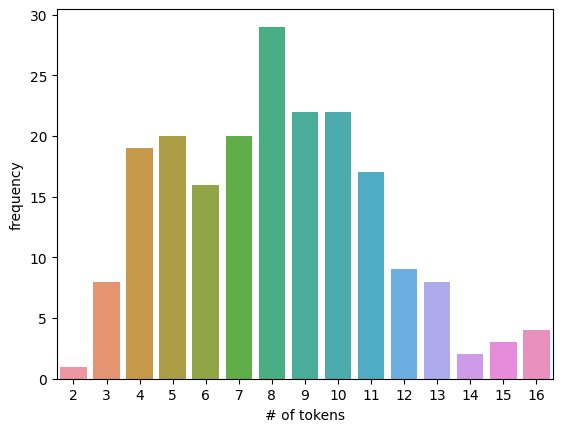

In [ ]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens) # x is length of the sentence, y is the frequency corresponding to that length
plt.xlabel('# of tokens')
plt.ylabel('frequency')
plt.show()

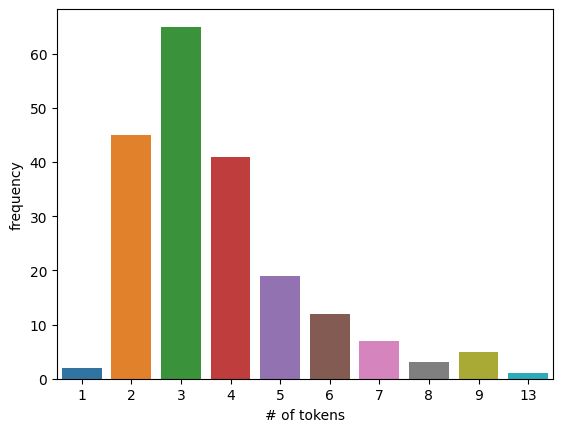

In [ ]:
lens = [len(seq) for seq in emoji_seqs]
sns.countplot(x=lens)
plt.xlabel('# of tokens')
plt.ylabel('frequency')
plt.show()

###Padding

In [40]:
from keras.utils import pad_sequences
max_len_sentences = 20
X_seqs_pd = pad_sequences(X_seqs, truncating="post", padding="post", maxlen=None)

In [41]:
print("Before Padding")
print(X_seqs[:1])
print(type(X_seqs))
print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[list([49, 81, 20, 5, 186, 187, 57, 188])]
<class 'numpy.ndarray'>

After Padding
[[ 49  81  20   5 186 187  57 188   0   0   0   0   0   0   0   0]]


In [22]:
max_len_emojis = 15
emoji_seqs_pd = pad_sequences(emoji_seqs, truncating="post", padding="post", maxlen=max_len_emojis)

In [39]:
print("Before Padding")
print(emoji_seqs[:1])
print(type(emoji_seqs_pd))
print("\nAfter Padding")
print(emoji_seqs_pd[:1])

Before Padding
[list([48, 49, 118])]
<class 'numpy.ndarray'>

After Padding
[[ 48  49 118   0   0   0   0   0   0   0   0   0   0   0   0]]


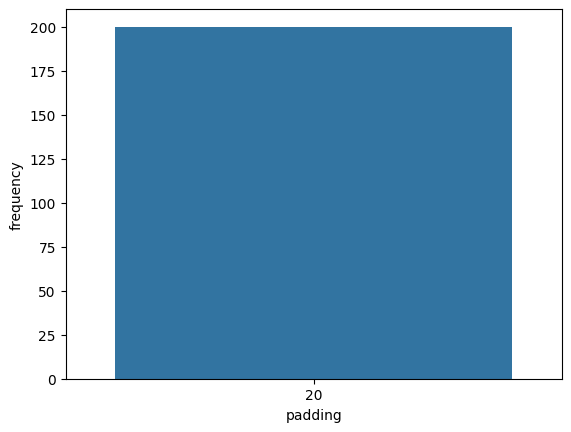

In [ ]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens) # x is length of the sentence, y is the frequency corresponding to that length
plt.xlabel('padding')
plt.ylabel('frequency')
plt.show()

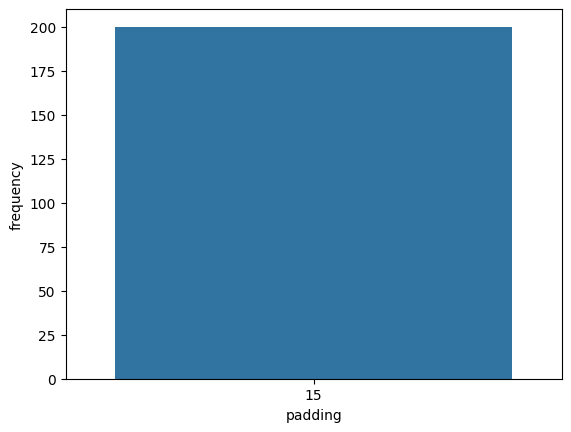

In [ ]:
lens = [len(seq) for seq in emoji_seqs_pd]
sns.countplot(x=lens)
plt.xlabel('padding')
plt.ylabel('frequency')
plt.show()

##Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
print(type(emoji_seqs))
emoji_seq = np.asarray(emoji_seqs)
X_seq = np.asarray(X_seqs)
X_train, X_test ,y_train, y_test = train_test_split(X_seq, emoji_seq, test_size=0.3, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

<class 'numpy.ndarray'>
Training X Dim  (140,)
Training y Dim  (140,)
Test X Dim  (60,)
Test y Dim  (60,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Embedding
from tensorflow.python.keras.callbacks import EarlyStopping

def generator():
    model = Sequential()
    model.add(Embedding(vocab_size + 1, 100, input_length=20))
    model.add(Dense(32, input_shape=(20,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(15, activation='sigmoid'))

    return model

generate = generator()

In [ ]:
generate.summary()
early_stop = EarlyStopping(monitor="accuracy", mode="min", patience=1,verbose=1)
generate.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 100)           48500     
                                                                 
 dense_44 (Dense)            (None, 20, 32)            3232      
                                                                 
 dense_45 (Dense)            (None, 20, 64)            2112      
                                                                 
 dense_46 (Dense)            (None, 20, 64)            4160      
                                                                 
 dense_47 (Dense)            (None, 20, 15)            975       
                                                                 
Total params: 58979 (230.39 KB)
Trainable params: 58979 (230.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
generate.fit(X_train, y_train, epochs=10, batch_size=28, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: ignored

In [38]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import tensorflow as tf

from keras.layers import Dense, LSTM, Embedding
# Define an input sequence and process it.
print(type(X_seq))
X_seq =tf.convert_to_tensor(X_seq)
encoder_inputs =Embedding(vocab_size + 1, 100)

encoder = LSTM(64, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs(X_seqs))
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


<class 'numpy.ndarray'>


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,batch_size=batch_size,epochs=epochs,validation_split=0.2)

##LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from tensorflow.python.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(vocab_size + 1, 100, input_length=20))
model.add(LSTM(64))
model.add(Dense(15, activation='softmax'))

early_stop = EarlyStopping(monitor="accuracy", mode="min", patience=1,verbose=1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=28, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           48500     
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 15)                975       
                                                                 
Total params: 91,715
Trainable params: 91,715
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 6s 356ms/step - loss: 580.5613 - accuracy: 0.1929 - val_loss: 638.7063 - val_accuracy: 0.2667
Epoch 2/10
5/5 [==============================] - 0s 42ms/step - loss: 558.5950 - accuracy: 0.3357 - val_loss: 609.4994 - val_accuracy: 0.2667
Epoch 3/10
5/5 [=============

In [ ]:
loss = pd.DataFrame(model.history.history)
loss

,loss,accuracy,val_loss,val_accuracy
0,580.561340,0.192857,638.706299,0.266667
1,558.594971,0.335714,609.499390,0.266667
2,519.360229,0.335714,545.895691,0.266667
3,435.824799,0.335714,457.659302,0.266667
4,379.310272,0.335714,492.344513,0.266667
5,410.886261,0.335714,531.922729,0.266667
6,435.968689,0.335714,562.691406,0.266667
7,458.088562,0.335714,588.511108,0.266667
8,475.024780,0.335714,608.744446,0.266667
9,486.855255,0.335714,623.450562,0.266667


In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

2/2 [==============================] - 1s 11ms/step
2313.311284236695


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from tensorflow.python.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(vocab_size + 1, 100, input_length=20))
model.add(LSTM(64))
model.add(Dense(15, activation='softmax'))

early_stop = EarlyStopping(monitor="accuracy", mode="min", patience=1,verbose=1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=28, callbacks=[early_stop], validation_data = (X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 100)           48500     
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 91,715
Trainable params: 91,715
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 3s 154ms/step - loss: 580.2427 - accuracy: 0.2500 - val_loss: 640.0416 - val_accuracy: 0.2667
Epoch 2/10
5/5 [==============================] - 0s 30ms/step - loss: 560.8694 - accuracy: 0.3357 - val_loss: 613.3743 - val_accuracy: 0.2667
Epoch 00002: early stopping

In [ ]:
loss = pd.DataFrame(model.history.history)
loss

,loss,accuracy,val_loss,val_accuracy
0,580.242676,0.250000,640.041626,0.266667
1,560.869446,0.335714,613.374329,0.266667


In [ ]:
# Testing LSTM model
try_sentences = ["I enjoy singing", "Are you sleeping?"]
prediction = pd.read_csv("Prediction.csv")
predicted_emoji = [[59, 8], [6, 52]]

test_sentence_sequence = tokenizer.texts_to_sequences([try_sentences])
test_sentence_sequence = pad_sequences(test_sentence_sequence, maxlen=20, padding='pre')

predicted_emoji_sequence = model.predict(test_sentence_sequence)
predicted_emoji_sequence = np.argmax(predicted_emoji_sequence, axis=-1)
predicted_emoji_sequence = [list(emoji_tokenizer.index_word[i] for i in predicted_emoji_sequence)]

##DistilBERT

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.29.1-py3-none-any.whl (7.1 MB)


In [ ]:
import numpy as np
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

In [ ]:
import tensorflow as tf
from transformers import DistilBertModel, TFDistilBertForSequenceClassification, DistilBertTokenizerFast
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split

# Example emoji sequence labels
train_labels = df['Manually assigned emojis'].values.tolist()

# Convert labels to sequences of numerical indices
keras_tokenizer = Tokenizer(char_level=True)
keras_tokenizer.fit_on_texts(train_labels)
train_label_sequences = keras_tokenizer.texts_to_sequences(train_labels)
max_label_length = 20  # maximum length of a label sequence
train_label_sequences_padded = pad_sequences(train_label_sequences, maxlen=max_label_length, padding='post')

# Example input text
train_texts = df['Sentences'].values.tolist()

In [ ]:
# Tokenize input text using DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, padding=True, truncation=True)

In [ ]:
from keras.utils import to_categorical
# Select a subset of labels that matches the number of samples in your input data
train_labels_subset = train_label_sequences_padded[:len(train_encodings['input_ids'])]
unique_classes = np.unique(train_labels_subset)
print(unique_classes)

# Convert labels to one-hot encoded vectors
train_labels_one_hot = to_categorical(train_labels_subset, num_classes=len(keras_tokenizer.word_index)+1)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
# Split data into training and validation sets
train_encodings, val_encodings, train_labels, val_labels = train_test_split(train_encodings['input_ids'], train_labels_one_hot, test_size=0.2)


In [ ]:
# len(train_label_sequences_padded)

In [ ]:
# len(train_encodings['input_ids'])

In [ ]:
# Convert label arrays to TensorFlow constants
train_labels = tf.constant(train_labels)
val_labels = tf.constant(val_labels)

In [ ]:
# Define and compile DistilBERT model
from tensorflow.keras.losses import categorical_crossentropy
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(keras_tokenizer.word_index)+1)
# output_layer = tf.keras.layers.Dense(257, activation='softmax', name='output_layer')(model.layers[-2].output)
# model = tf.keras.Model(inputs=model.input, outputs=output_layer)

def padded_categorical_crossentropy(y_true, y_pred):
    """
    Computes categorical crossentropy loss with masking for padded values.
    """
    mask = tf.math.logical_not(tf.math.reduce_all(tf.math.equal(y_true, 0), axis=-1))
    masked_true = tf.boolean_mask(y_true, mask)
    masked_pred = tf.boolean_mask(y_pred, mask)
    loss = tf.keras.losses.categorical_crossentropy(masked_true, masked_pred)
    return loss

# Compile model with custom loss function
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])


# model.distilbert.transformer.layer[-1].output_layer_norm.activation = tf.keras.activations.softmax # add softmax activation to last layer
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_59', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
val_encodings = np.array(val_encodings)
train_encodings = np.array(train_encodings)

In [ ]:
val_labels = np.array(val_labels)
train_labels = np.array(train_labels)

In [ ]:
# Train DistilBERT model
model.fit(train_encodings, train_labels, epochs=3, batch_size=16, validation_data=(val_encodings, val_labels))

Epoch 1/3


ValueError: ignored

In [ ]:
import tensorflow as tf
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizerFast
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# Example emoji sequence labels
train_labels = df['Manually assigned emojis'].values.tolist()

# Convert labels to sequences of numerical indices
keras_tokenizer = Tokenizer(char_level=True)
keras_tokenizer.fit_on_texts(train_labels)
train_label_sequences = keras_tokenizer.texts_to_sequences(train_labels)
max_label_length = 20  # maximum length of a label sequence
train_label_sequences_padded = pad_sequences(train_label_sequences, maxlen=max_label_length, padding='post')

# Example input text
train_texts = df['Sentences'].values.tolist()
# Tokenize input text using DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, padding=True, truncation=True)

# Convert labels to one-hot encoded vectors
train_labels_one_hot = tf.one_hot(train_label_sequences_padded, depth=len(keras_tokenizer.word_index)+1)

from keras.utils import to_categorical
# Select a subset of labels that matches the number of samples in your input data
train_labels_subset = train_label_sequences_padded[:len(train_encodings['input_ids'])]
unique_classes = np.unique(train_labels_subset)
print(unique_classes)

# Convert labels to one-hot encoded vectors
train_labels_one_hot = to_categorical(train_labels_subset, num_classes=len(keras_tokenizer.word_index)+1)

# Split data into training and validation sets
train_encodings, val_encodings, train_labels, val_labels = train_test_split(train_encodings['input_ids'], train_labels_one_hot, test_size=0.2)

# Load the pre-trained DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(keras_tokenizer.word_index)+1)

# Add a dense layer with softmax activation to the output of the pre-trained model
output_layer = tf.keras.layers.Dense(len(keras_tokenizer.word_index)+1, activation='softmax', name='output_layer')(model.layers[-2].output)

# Compile the model
model = tf.keras.Model(inputs=model.input, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_encodings, train_labels, epochs=3, batch_size=16, validation_data=(val_encodings, val_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(val_encodings, val_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_layer_norm', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

AttributeError: ignored

##T5

In [ ]:
pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.3 MB/s eta 0:00:00


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.5 MB/s eta 0:00:00


In [ ]:
import torch
import transformers
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df.head(5)

,Sentences,Manually assigned emojis
0,look there 's a folk concert tomorrow evening,🎤🎶🌆
1,do you like cook ?,🧑🏽‍🍳❤️❓
2,will you help me water the flower ?,💧🌷❓
3,i clean the house and play tennis,🧹🏠🎾
4,i 'm glad it do not rain,☔🙅😀


In [ ]:
# Split the dataset into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
import transformers
from transformers import T5Tokenizer

# Load the T5 tokenizer
tokenizer = transformers.T5Tokenizer.from_pretrained("t5-small")

In [ ]:
def tokenize_data(data):
    input_ids = []
    output_ids = []
    sentences = df.values.tolist()
    for line in sentences:
        sentence = line[0]
        emoji_sequence = line[1]
        input_ids.append(tokenizer.encode(sentence, padding='max_length', max_length=128, truncation=True, return_tensors='pt')[0])
        output_ids.append(tokenizer.encode(emoji_sequence, padding='max_length', max_length=128, truncation=True, return_tensors='pt')[0])
    return input_ids, output_ids

train_input_ids, train_output_ids = tokenize_data(train_data)
test_input_ids, test_output_ids = tokenize_data(test_data)

In [ ]:
# Define the model
model = transformers.T5ForConditionalGeneration.from_pretrained('t5-small')

In [ ]:
# Add an extra layer on top of the T5 model to predict the output sequence
class EmojiSequenceModel(torch.nn.Module):
    def __init__(self, t5_model):
        super(EmojiSequenceModel, self).__init__()
        self.t5 = t5_model
        self.output_layer = torch.nn.Linear(768, 256)

    def forward(self, input_ids, **kwargs):
        t5_outputs = self.t5(input_ids, **kwargs)
        model_output = t5_outputs.to_model_output()
        hidden_state = t5_outputs.last_hidden_state
        output_logits = self.output_layer(hidden_state)
        return output_logits

model = EmojiSequenceModel(model)

In [ ]:
# Train the model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = model.to(device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)
criterion = torch.nn.CrossEntropyLoss(ignore_index=0)

In [ ]:
train_dataset = torch.utils.data.TensorDataset(torch.stack(train_input_ids), torch.stack(train_output_ids))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids, output_ids = batch
        input_ids = input_ids.to(device)
        output_ids = output_ids.to(device)

        optimizer.zero_grad()

        decoder_input_ids = torch.cat([output_ids[:, 0:1], output_ids[:, :-1]], dim=1)
        outputs = model(input_ids=input_ids, decoder_input_ids=decoder_input_ids)

        logits = outputs.logits

        loss = criterion(logits.view(-1, 256), output_ids.view(-1))

        loss.backward()

        optimizer.step()

    print(f'Epoch {epoch+1}: Loss = {loss.item()}')

AttributeError: ignored

##GPT-2

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.6 MB/s eta 0:00:00


In [ ]:
import torch
import transformers

# Load the GPT-2 model.
model = transformers.GPT2Model.from_pretrained("gpt2")

In [ ]:
train_sentences = X_seqs_pd[:160]
train_emojis = emoji_seqs_pd[:160]

test_sentences = X_seqs_pd[160:]
test_emojis = emoji_seqs_pd[160:]

test_data = zip(test_sentences, test_emojis)

# Choosing hyperparameters
learning_rate = 0.0001
num_epochs = 10
batch_size = 32

In [ ]:
# Train the model.
import torch.nn as nn
# import evaluate
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.train()
for epoch in range(num_epochs):

    total_loss = 0
    for sentence, emoji in zip(train_sentences, train_emojis):

        # Convert the sentence and emojis to tensors.
        sentence_tensor = torch.tensor(sentence, dtype=torch.long)
        emojis_tensor = torch.tensor(emoji, dtype=torch.long)

        # Forward pass.
        outputs = model(sentence_tensor)

        # Loss calculation.
        loss = outputs[0]

        # Backward pass.
        model.zero_grad()
        criterion = nn.CrossEntropyLoss()

        # loss = criterion(outputs.last_hidden_state.view(-1, 256), emojis_tensor.view(-1))
        outputs.last_hidden_state = outputs.last_hidden_state.to(device)
        outputs.last_hidden_state = outputs.last_hidden_state.view(15, -1)

        emojis_tensor = emojis_tensor.to(device)

        loss = criterion(outputs.last_hidden_state.view(15, -1), emojis_tensor.view(-1))

        loss.backward()

        # Gradient descent.
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_sentences)

    # Evaluate the model.
    print("Epoch {}: Loss = {:.4f}".format(epoch + 1, average_loss))


Epoch 1: Loss = 8.7755
Epoch 2: Loss = 2.4423
Epoch 3: Loss = 1.9600
Epoch 4: Loss = 1.8090
Epoch 5: Loss = 1.6460
Epoch 6: Loss = 1.6252
Epoch 7: Loss = 1.4568
Epoch 8: Loss = 1.4180
Epoch 9: Loss = 1.4011
Epoch 10: Loss = 1.3038


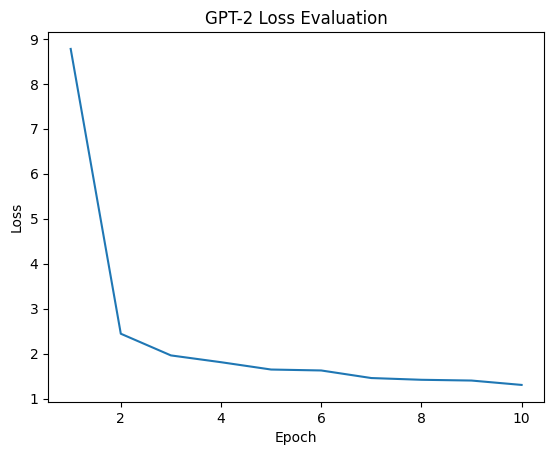

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

y = [8.7755, 2.4423, 1.9600, 1.8090, 1.6460, 1.6252, 1.4568, 1.4180, 1.4011, 1.3038]

plt.plot(x, y)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.title('GPT-2 Loss Evaluation')

plt.show()

##Models Evaluation

In [ ]:
gptLosses = [8.7755, 2.4423, 1.9600, 1.8090, 1.6460, 1.6252, 1.4568, 1.4180, 1.4011, 1.3038]
lstmLosses = [580.5613, 558.5949, 519.3602, 435.8247, 379.3102, 410.8862, 435.9686, 458.0885, 475.0247, 486.8552]
eval = pd.DataFrame(list(zip(lstmLosses, gptLosses)),columns =['LSTM', 'GPT-2'], index=['epoch 1', 'epoch 2','epoch 3','epoch 4','epoch 5','epoch 6','epoch 7','epoch 8','epoch 9','epoch 10'])
eval

,LSTM,GPT-2
epoch 1,580.5613,8.7755
epoch 2,558.5949,2.4423
epoch 3,519.3602,1.9600
epoch 4,435.8247,1.8090
epoch 5,379.3102,1.6460
epoch 6,410.8862,1.6252
epoch 7,435.9686,1.4568
epoch 8,458.0885,1.4180
epoch 9,475.0247,1.4011
epoch 10,486.8552,1.3038


In [ ]:
test = ["The museum has such incredible exhbits", "I'm so excited to start a new chapter in my life!"]

sentence_tensor = torch.tensor(test_sentences[1], dtype=torch.long)

# Forward pass.
outputs = model(sentence_tensor)

# Get the predicted emojis.
predicted_emojis = outputs[0].argmax(dim=-1).tolist()
predicted_emoji_sequence = [list(emoji_tokenizer.index_word[i] for i in predicted_emoji[1])]

print("".join(predicted_emoji_sequence[0]))

🤩😊


In [ ]:
predictions = pd.DataFrame({"Sentence": X[160:]})
predictions["Actual emojis"] = Y[160:]

emojis_predicted = []

for tokenized_sentence in test_sentences:

    sentence_tensor = torch.tensor(test_sentences[1], dtype=torch.long)
    outputs = model(sentence_tensor)

    predicted_emojis = outputs[0].argmax(dim=-1).tolist()
    predicted_emoji_sequence = [list(emoji_tokenizer.index_word[i] for i in predicted_emoji[1])]
    emojis_predicted.append(predicted_emoji_sequence)


predictions["Predicted emojis"] = emojis_predicted
prediction.head(40)

,Sentences,Manually Assigned Emojis,Predicted Emojis
0,The museum has such incredible exhbits.,🖼️🎨👌,🖼️👌
1,I'm so excited to start a new chapter in my life!,📖🤩,🤩😊
2,This new project I'm working on is so exciting...,💻📈🤩,💻🤩
3,I'm feeling a little nervous about this big pr...,😬🎤💼,😟🎤
4,"I'm feeling a little bored and restless, I nee...",🥱🥳🤔,🥱😩🥳
5,"That DIY project was so fun and rewarding, I c...",🛠️✂️💡,✂️💡👌
6,I'm sorry to hear that you're going through a ...,😔❤️🤗,😔🙏
7,Did you catch the football game last night?,⚽️📺❓,⚽❓
8,I'm really enjoying this book so far.,📖🤩👍,📖👍
9,I can't wait to see you again soon!,😍💕👋,😍👋💕
